# Steps to setup a local MySQL server

# Steps to connect to this locally hosted MySql server 

In [1]:
#Execute to install the connector
!pip install mysql-connector-python

In [2]:
import mysql.connector
from mysql.connector import Error
from Credential.credential import user      #should be commented
from Credential.credential import password  #should be commented

In [3]:
# Connect to local host Instance with orders as the database
try:
    connection = mysql.connector.connect(host='localhost',
                                         database='orders',
                                         user=user,         #Root by default if above steps were followed
                                         password=password) #Configure your root password here. I have used my own
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)

Connected to MySQL Server version  8.0.34
You're connected to database:  ('orders',)


In [4]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [5]:
def gd(sql):
    return pd.read_sql(sql,connection)

In [6]:
# Verify if data is being fetched
gd(
'''
Select * 
from address
limit 1'''
)

,ADDRESS_ID,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,PINCODE,COUNTRY
0,909,"H.NO.16, Sector-4, 14th Cross","Near BDA Complex, HSR Layout",Bangalore,Karnataka,560172,India


# Glance at the data

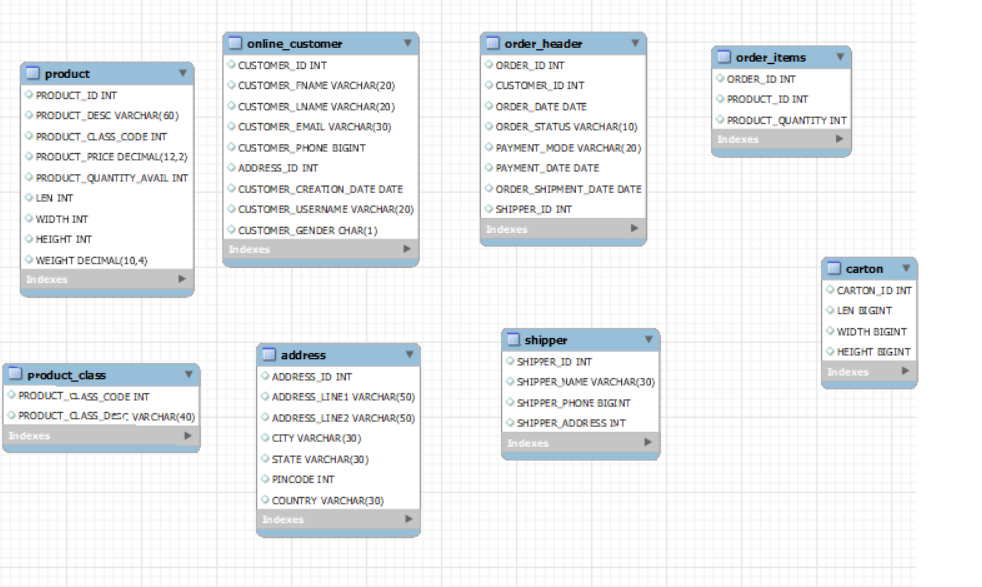

In [7]:
# List of all columns in the schema
gd('''
select * from information_schema.columns
where table_schema = 'orders'
order by table_name,ordinal_position

''')

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,COLUMN_NAME,ORDINAL_POSITION,COLUMN_DEFAULT,IS_NULLABLE,DATA_TYPE,CHARACTER_MAXIMUM_LENGTH,CHARACTER_OCTET_LENGTH,...,DATETIME_PRECISION,CHARACTER_SET_NAME,COLLATION_NAME,COLUMN_TYPE,COLUMN_KEY,EXTRA,PRIVILEGES,COLUMN_COMMENT,GENERATION_EXPRESSION,SRS_ID
0,def,orders,address,ADDRESS_ID,1,None,YES,int,NaN,NaN,...,None,None,None,int,UNI,,"select,insert,update,references",,,None
1,def,orders,address,ADDRESS_LINE1,2,None,YES,varchar,50.0,200.0,...,None,utf8mb4,utf8mb4_0900_ai_ci,varchar(50),,,"select,insert,update,references",,,None
2,def,orders,address,ADDRESS_LINE2,3,None,YES,varchar,50.0,200.0,...,None,utf8mb4,utf8mb4_0900_ai_ci,varchar(50),,,"select,insert,update,references",,,None
3,def,orders,address,CITY,4,None,YES,varchar,30.0,120.0,...,None,utf8mb4,utf8mb4_0900_ai_ci,varchar(30),,,"select,insert,update,references",,,None
4,def,orders,address,STATE,5,None,YES,varchar,30.0,120.0,...,None,utf8mb4,utf8mb4_0900_ai_ci,varchar(30),,,"select,insert,update,references",,,None
5,def,orders,address,PINCODE,6,None,YES,int,NaN,NaN,...,None,None,None,int,,,"select,insert,update,references",,,None
6,def,orders,address,COUNTRY,7,None,YES,varchar,30.0,120.0,...,None,utf8mb4,utf8mb4_0900_ai_ci,varchar(30),,,"select,insert,update,references",,,None
7,def,orders,carton,CARTON_ID,1,None,YES,int,NaN,NaN,...,None,None,None,int,UNI,,"select,insert,update,references",,,None
8,def,orders,carton,LEN,2,None,YES,bigint,NaN,NaN,...,None,None,None,bigint,,,"select,insert,update,references",,,None
9,def,orders,carton,WIDTH,3,None,YES,bigint,NaN,NaN,...,None,None,None,bigint,,,"select,insert,update,references",,,None


In [8]:
gd('''show tables''')

,Tables_in_orders
0,address
1,carton
2,online_customer
3,order_header
4,order_items
5,product
6,product_class
7,shipper


# Overview of Objectives

In [27]:
# Concepts to learn:
# Assuming the user is using this as a revision of SQL and is aware of basic select query structure